In [89]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
data= open('noisy.txt').read()

In [90]:
df = pd.read_csv('noisy.txt',  sep=" ", header=None)

In [91]:
df = df.dropna(axis='columns')

In [92]:
df

,2,4,7,10,13,16,19,22,25,28,...,4059,4062,4065,4068,4071,4073,4076,4079,4082,4084
0,-0.016016,-0.001384,0.213711,0.012916,0.070106,0.082578,0.152448,0.091472,0.11654,0.122094,...,-0.045569,0.115444,0.047764,0.143861,0.019936,-0.084285,0.047587,0.138064,0.044504,-0.010632


In [93]:
df = df.to_numpy()
df = df.flatten()

In [94]:
## Define the objective, subgradient oracle, proximal operator, and gradient for smoothed function (Huber)  
def obj(x, z, lam):
    D = (-np.identity(1571) + np.diag([1]*1570,k=1))[:-1]
    l1 = np.linalg.norm((D*x), ord=1)
    objective = .5*(np.sum(np.power((x-z),2))) + lam * l1
    return objective

def subgrad(x, z, lam, D):
    return  x-z + lam * D.T * np.sign(D*x) 

In [19]:
## Subgradient Descent
z = df
x = np.matrix([0.0]*1571).T
lam = 1/math.sqrt(1571)
D = (-np.identity(1571) + np.diag([1]*1570,k=1))[:-1]
obj_SD = []
gamma = 0.01
for t in range(0, 100):
    obj_val = obj(x, z, lam)
    x = x - gamma * subgrad(x, z, lam,D)/np.sqrt(t+1)
    
    obj_SD.append(obj_val.item())
    if (t%5==0):
        print('iter= {},\tobjective= {:3f}'.format(t, obj_val.item()))

iter= 0,	objective= 631451.435130
iter= 5,	objective= 591793.707794
iter= 10,	objective= 570952.970009
iter= 15,	objective= 555244.139972
iter= 20,	objective= 542264.942181
iter= 25,	objective= 531047.626634
iter= 30,	objective= 521087.213617
iter= 35,	objective= 512080.810421
iter= 40,	objective= 503829.880677
iter= 45,	objective= 496195.979838
iter= 50,	objective= 489078.042704
iter= 55,	objective= 482399.638859
iter= 60,	objective= 476101.320840
iter= 65,	objective= 470135.779396
iter= 70,	objective= 464464.641630
iter= 75,	objective= 459056.278678
iter= 80,	objective= 453884.259318
iter= 85,	objective= 448926.231181
iter= 90,	objective= 444163.093435
iter= 95,	objective= 439578.373223


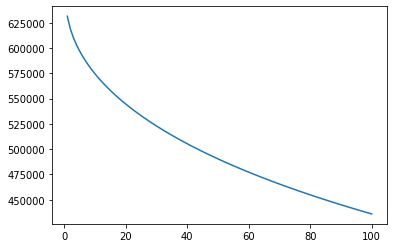

In [20]:
plt.plot(range(1, 100+1), obj_SD)

In [95]:
## Subgradient Descent
z = df
x = np.matrix([0.0]*1571).T
lam = 1/math.sqrt(1571)
obj_SD = []
gamma = 0.1
for t in range(0, 100):
    obj_val = obj(x, z, lam)
    x = x - gamma * subgrad(x, z, lam,D)/np.sqrt(t+1)
    
    obj_SD.append(obj_val.item())
    if (t%5==0):
        print('iter= {},\tobjective= {:3f}'.format(t, obj_val.item()))

iter= 0,	objective= 631451.435130
iter= 5,	objective= 322983.478095
iter= 10,	objective= 224330.034933
iter= 15,	objective= 169110.455331
iter= 20,	objective= 133147.818853
iter= 25,	objective= 107817.004900
iter= 30,	objective= 89073.206086
iter= 35,	objective= 74718.291826
iter= 40,	objective= 63439.522526
iter= 45,	objective= 54399.257594
iter= 50,	objective= 47035.996037
iter= 55,	objective= 40958.653257
iter= 60,	objective= 35886.355716
iter= 65,	objective= 31612.240167
iter= 70,	objective= 27980.708313
iter= 75,	objective= 24872.606878
iter= 80,	objective= 22195.271830
iter= 85,	objective= 19875.663417
iter= 90,	objective= 17855.524440
iter= 95,	objective= 16087.897521


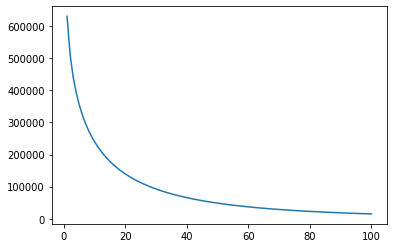

In [22]:
plt.plot(range(1, 100+1), obj_SD)

In [97]:
## Subgradient Descent
z = df
x = np.matrix([0.0]*1571).T
lam = 1/math.sqrt(1571)
obj_SD = []
gamma = 0.001
for t in range(0, 100):
    obj_val = obj(x, z, lam)
    x = x - gamma * subgrad(x, z, lam, D)/np.sqrt(t+1)
    
    obj_SD.append(obj_val.item())
    if (t%5==0):
        print('iter= {},\tobjective= {:3f}'.format(t, obj_val.item()))

iter= 0,	objective= 631451.435130
iter= 5,	objective= 627381.876738
iter= 10,	objective= 625140.302626
iter= 15,	objective= 623400.846990
iter= 20,	objective= 621929.614025
iter= 25,	objective= 620632.173365
iter= 30,	objective= 619459.162006
iter= 35,	objective= 618380.923111
iter= 40,	objective= 617377.987578
iter= 45,	objective= 616436.758904
iter= 50,	objective= 615547.297187
iter= 55,	objective= 614702.074708
iter= 60,	objective= 613895.228219
iter= 65,	objective= 613122.085197
iter= 70,	objective= 612378.850532
iter= 75,	objective= 611662.391859
iter= 80,	objective= 610970.088029
iter= 85,	objective= 610299.719417
iter= 90,	objective= 609649.386756
iter= 95,	objective= 609017.449916


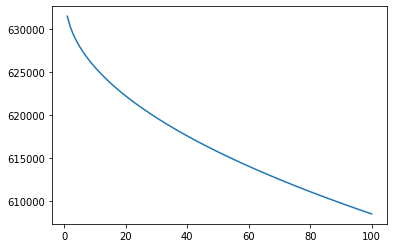

In [98]:
plt.plot(range(1, 100+1), obj_SD)

# Proximal Gradient Descent

In [23]:
def obj(x, z, lam):
    D = (-np.identity(1571) + np.diag([1]*1570,k=1))[:-1]
    l1 = numpy.linalg.norm((D*x), ord=1)
    objective = .5*(np.sum(np.power((x-z),2))) + lam * l1
    return objective

In [63]:
import pandas as pd
import numpy as np
import math
from scipy.sparse import diags
data= open('noisy.txt').read()
df = pd.read_csv('noisy.txt',  sep=" ", header=None)
df = df.dropna(axis='columns')
df = df.to_numpy()
df = df.flatten()

In [36]:
def soft_threshold(z, lam):
    indicator = 0
    
    for i in z:
        
    
        if (np.abs(i) <= lam)==True:
            indicator = 0
        else:
            indicator = 100e50
        
    return indicator
    

In [44]:
def dual_grad(u,z, D):
    grad = np.dot(u.T, z.T) + np.dot(z.T, D.T)
    return grad

In [57]:
def obj_prox(x, z, lam, t):
    
    diff = ((np.sum(np.power((x-z),2)))/(2*t)) + soft_threshold(z, lam)
    objective = np.argmin(diff, axis=0)
    return objective

In [60]:
## Proximal Gadient 
# z = df
# x = np.matrix([0.0]*1571).T
# lam = 1/math.sqrt(1571)
# obj_PG = []
# for t in range(0, 100):
#     obj_val = obj_prox(x, z, lam, 10)
#     x = x - (1/10)* dual_grad(x, z, D)
#     x= obj_prox(x, z, lam, D)
    
#     obj_PG.append(obj_val.item())
#     if (t%5==0):
#         print('iter= {},\tobjective= {:3f}'.format(t, obj_val.item()))

In [64]:
df = np.genfromtxt('./noisy.txt', delimiter='')

In [104]:
def matrixD(n):
    D = diags([-1, 1], [0, 1], shape=(n-1,n)).toarray()
    return D

def lossproximal(u, data, D):
    error = 0.5*np.linalg.norm(np.dot(D.T, u),ord=2)**2 - np.dot(u, np.dot(D, data))
    return error

def denoise(data,stepsize,lambbda, iterations=1000):
    
    plt.clf()

    x, error = solveproximal(proximalmodel, data=data, stepsize=stepsize, lambbda=lambbda, iterations=iterations)
    plt.plot(data, label = 'original',c='black')
    plt.plot(x, label = 'denoised',c='blue')

    plt.xlabel('index')
    plt.ylabel('data')
    plt.legend()
    #plt.savefig(file) 
    plt.show()

In [80]:
def proximalmodel(u, data, stepsize, lambbda, D):
    u = u - stepsize*(np.dot(D, np.dot(D.T, u) - data))
    u[u>lambbda]  = lambbda
    u[u<-lambbda] = -lambbda
    return u

def solveproximal(model, data, stepsize=0.01, lambbda=0.1, iterations=int(1e3)):
    n = data.shape[0]
    u = np.random.randn(n-1)
    u[u>lambbda]  = lambbda
    u[u<-lambbda] = -lambbda
    D = matrixD(n)

    error = []
    
    for k in range(iterations):
        if (k % 1 == 0) or (k == iterations - 1):
            error.append(lossproximal(u, data, D))
            assert not np.isnan(error[-1])
        u = model(u, data, stepsize, lambbda, D)
    u = data - np.dot(D.T, u)        
    return u, error


In [81]:
def visual(data,model,gradient, lowerlimit, upperlimit, lambbda, iterations, i):
    plt.clf()
    stepsize = 10**i
    x, error = model(gradient, data, stepsize=stepsize, lambbda=lambbda, iterations=iterations)
    plt.plot(error, label = 'stepsize={}'.format(stepsize))

    plt.xlabel('number of iterations')
    plt.ylabel('training error')
    plt.legend()
    #plt.savefig(file) 
    plt.show()

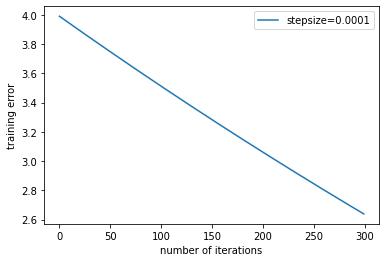

In [76]:
visual(df,model=solveproximal,gradient=proximalmodel,  lowerlimit=-4, upperlimit=0, lambbda=0.05, iterations=300, i=-4)

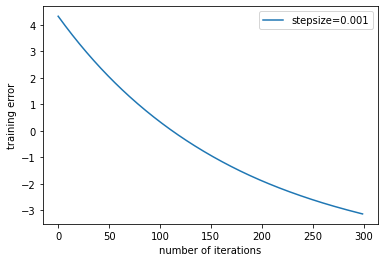

In [77]:
visual(df,model=solveproximal,gradient=proximalmodel,  lowerlimit=-4, upperlimit=0, lambbda=0.05, iterations=300, i=-3)

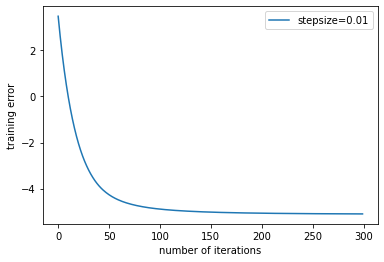

In [78]:
visual(df,model=solveproximal,gradient=proximalmodel,  lowerlimit=-4, upperlimit=0, lambbda=0.05, iterations=300, i=-2)

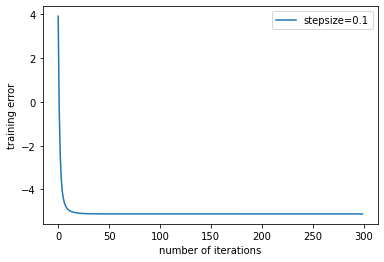

In [79]:
visual(df,model=solveproximal,gradient=proximalmodel,  lowerlimit=-4, upperlimit=0, lambbda=0.05, iterations=300, i=-1)

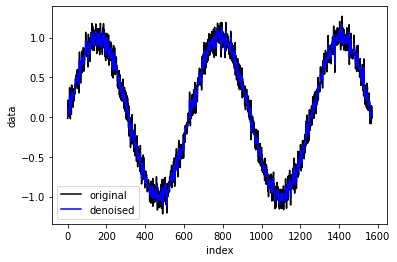

In [105]:
denoise(df, stepsize=0.1, lambbda=0.05)

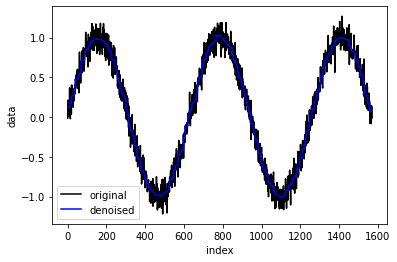

In [106]:
denoise(df, stepsize=0.1, lambbda=0.5)

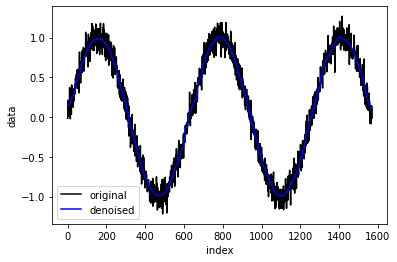

In [88]:
denoise(df, stepsize=0.1, lambbda=1)